## EDA - Titanic Data Set
(just some exploration through Titanic Data Set)

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading csv file into a data frame
df = pd.read_csv('__dataset___')

In [25]:
#columns in the data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Person'],
      dtype='object')

In [27]:
#explore first few rows of the data set
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [28]:
#explore values in data set
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


    ##looks like there were: 
        -891 passengers in titanic, 
        -survived column has 0 or 1 (binray No or Yes), 
        -Pclass has three different classes of passengers (1, 2, 3)

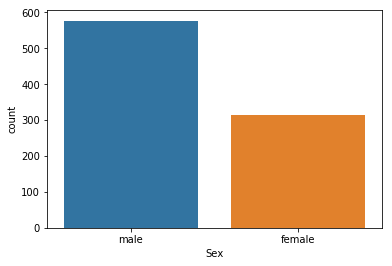

In [29]:
#using seaborn for counting values
sns.countplot(x='Sex', data=df)

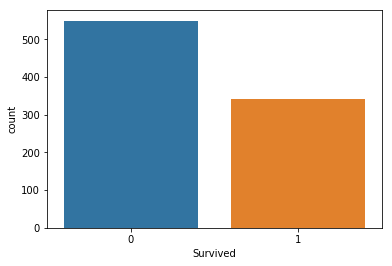

In [30]:
sns.countplot(x='Survived', data=df)

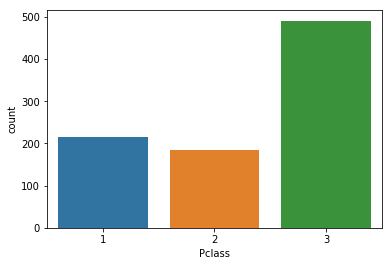

In [31]:
sns.countplot(x='Pclass', data=df)

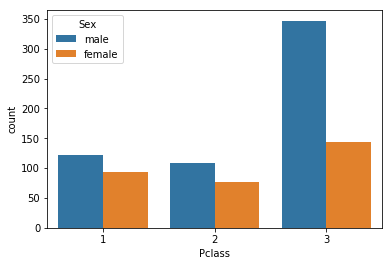

In [32]:
#class count by Sex
sns.countplot(x='Pclass', data=df, hue='Sex')

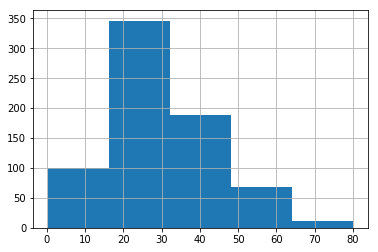

In [36]:
#histogram of Age distribution
df['Age'].hist(bins=5)

    ##Looks like there were a lot of passengers under the age of 18. Let's create a function to see the number of those passengers. 

In [37]:
#function to label any passenger under 18 as Child
def male_female_child(passenger):
    age, sex = passenger
    if age < 18:
        return 'child'
    else:
        return sex

In [38]:
#create a new column and apply that function
df['Person'] = df[['Age', 'Sex']].apply(male_female_child, axis=1)

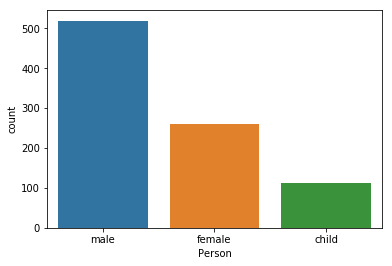

In [40]:
#countplot
sns.countplot(x='Person', data=df)

In [41]:
#value counts
df['Person'].value_counts()

male      519
female    259
child     113
Name: Person, dtype: int64

    ##exploring another type of seaborn plot - FacetGrid/kdeplot
    
    ## distribution of Age by Person 

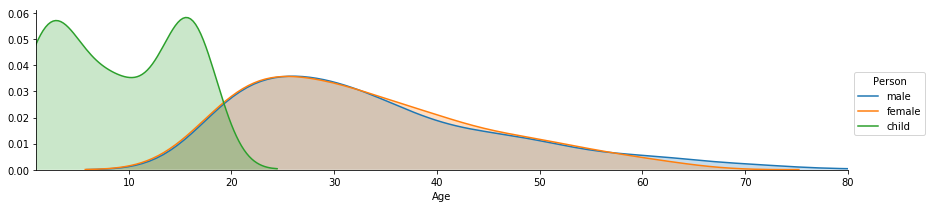

In [42]:
fig = sns.FacetGrid(df, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(1, oldest))
fig.add_legend() #add legend

    ## distribution of Age by Sex

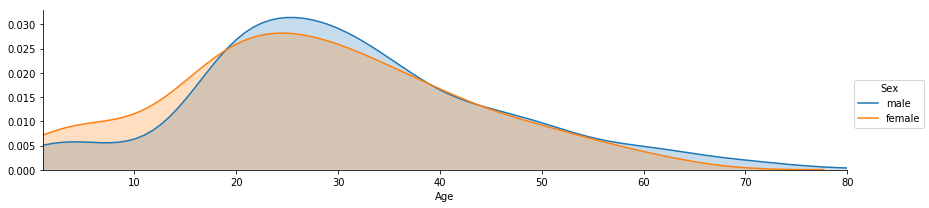

In [46]:
fig = sns.FacetGrid(df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(1, oldest))
fig.add_legend() #add legend

## Let's explore survival by Pclass & Sex

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Person         891 non-null object
Survivor       891 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 97.5+ KB


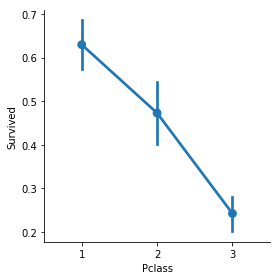

In [49]:
sns.factorplot('Pclass', 'Survived', data=df)

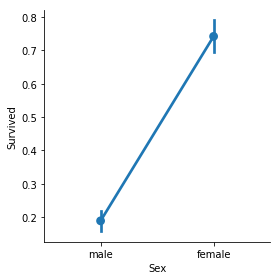

In [59]:
sns.factorplot('Sex', 'Survived', data=df)

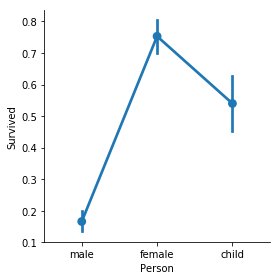

In [61]:
sns.factorplot('Person', 'Survived', data=df)

In [51]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Person'],
      dtype='object')

### creating a new column Survivor - Yes/No based on Survived Column

In [62]:
df['Survivor'] = df['Survived'].map({0: 'No', 1:'Yes'})

In [63]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Person', 'Survivor'],
      dtype='object')

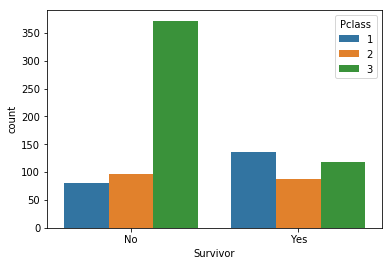

In [65]:
#Survival by Pclass
sns.countplot('Survivor', data=df, hue='Pclass')

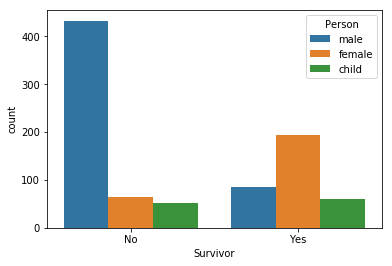

In [66]:
#Survival by Person
sns.countplot('Survivor', data=df, hue='Person')

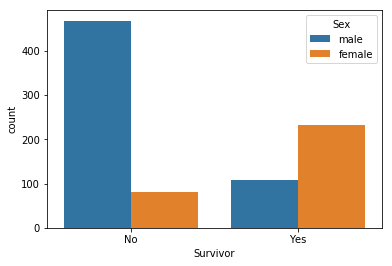

In [68]:
#Survival by Sex
sns.countplot('Survivor', data=df, hue='Sex')